# Baseline Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
#%matplotlib inline

mongodb_user = 'user'
mongodb_password = 'password'
mongodb_host = 'ds263759.mlab.com:63759'
mlab_url = 'mongodb://{}:{}@{}/news_db'.format(mongodb_user,mongodb_password,mongodb_host)
client = MongoClient(mlab_url)
news_db = client.get_database('news_db')
news_coll = news_db.news

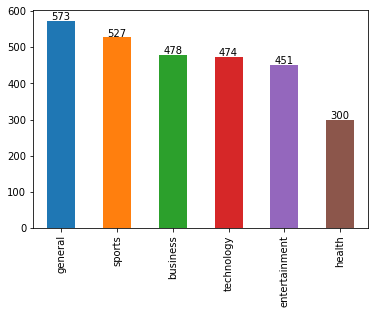

In [35]:
import json
import sys

news_store = list()
with open('./news_baseline.json','r',encoding="utf8") as f :
    ls = f.readlines()
    for l in ls:
        news = json.loads(l)
        if(news['category']=="science"):
            news['category']="technology"
        news_store.append(news)

news_store = pd.DataFrame(news_store)
news_store.drop('_id', axis=1, inplace=True)
 
ax =  news_store['category'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
# plt.figure(figsize=(1,2))
plt.show()

In [89]:
a = news_store[news_store['category'] == 'general'].head()['url']
a

40    https://www.cnn.com/2018/05/01/politics/trump-...
41    https://www.bloomberg.com/news/articles/2018-0...
42    https://www.politico.com/story/2018/05/01/ivan...
43    https://www.washingtonpost.com/national/religi...
44    http://money.cnn.com/2018/05/01/technology/fac...
Name: url, dtype: object

In [93]:
a.iloc[3 ]

'https://www.washingtonpost.com/national/religion/michigan-catholic-school-to-use-modesty-ponchos-at-prom/2018/05/01/1b65af0a-4d61-11e8-85c1-9326c4511033_story.html'